## Import Library

In [0]:
import numpy as np
import matplotlib.pyplot as plt

from fitting import SLB_LSInv


### Load data observation
In this case, we use data from samples data

In [0]:
fname = './samples/sample1.txt'
data = np.loadtxt(fname)    #data
ab2 = data[:, 0]            #half space of electrode
rhoap_obs = data[:, 1]      #apperant resistivities from observation

## Initial Model
Model initial are the resistivities and thickness of layers

In [0]:
rhotr = np.array([150, 20, 2])
thick = np.array([20, 15])

#initialization parameter
epsilon = 0.005     #parturbation of models, use in calculate jacobian matrices
err_min = 0.01      #expecting minumum error
damping = 0.01      #damping factor for LM Inversion

## Inverse Modelling

In [24]:
inversion = SLB_LSInv()
rho, thick = inversion.fit(ab2, rhoap_obs, rhotr, thick, damping=damping, epsilon=epsilon, method='lm' , err_min= err_min, iter_max = 20, filter_coeff='guptasarma_7')

print('rho model :', rho)
print('thickness :', thick)

rho model : [99.98103781 49.49467473 19.99279318]
thickness : [ 5.03924392 10.07985736]


## Plotting Earth Model

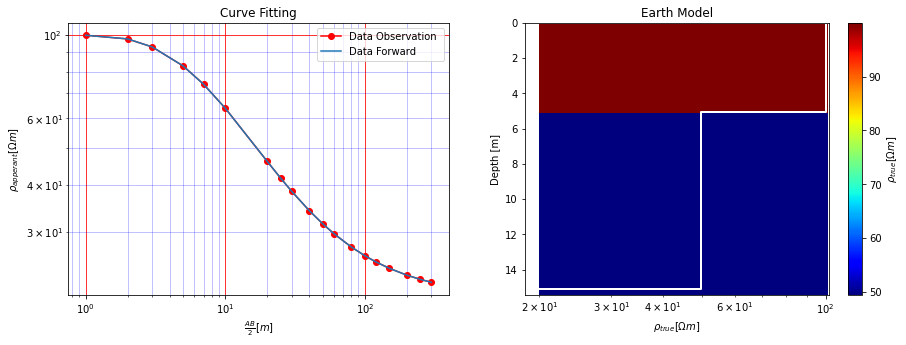

In [29]:
fig = inversion.plot_mod()
plt.savefig('/content/drive/My Drive/pyves/examples/Inversion_Earth_Model.png')

## Plotting the Error


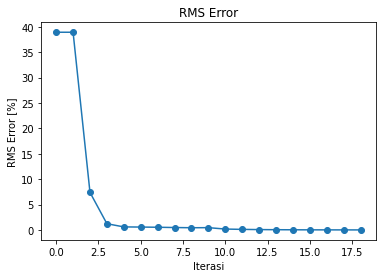

In [30]:
inversion.plot_err()
plt.savefig('/content/drive/My Drive/pyves/examples/Inversion_Error.png')